In [1]:
from pyspark import SparkContext
from pyspark.sql import SparkSession

In [2]:
from pyspark.sql import functions as F
from pyspark.sql.functions import col, isnan, when, count, isnull

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
spark = SparkSession.builder \
    .appName("Flight Data Analysis") \
    .getOrCreate()

In [5]:
#spark.stop()

In [6]:
import glob
import os
os.getcwd()
folder_path = 'raw'
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
df = spark.read.csv(csv_files,
                       sep = ',',
                       inferSchema = True,
                       header = True)

In [7]:
num_entries = 29193782

In [10]:
non_null_counts = df.select([count(col(c)).alias(c) for c in df.columns]).collect()[0].asDict()
print(non_null_counts)

{'Year': 29193782, 'Quarter': 29193782, 'Month': 29193782, 'DayofMonth': 29193782, 'DayOfWeek': 29193782, 'FlightDate': 29193782, 'Marketing_Airline_Network': 29193782, 'Operated_or_Branded_Code_Share_Partners': 29193782, 'DOT_ID_Marketing_Airline': 29193782, 'IATA_Code_Marketing_Airline': 29193782, 'Flight_Number_Marketing_Airline': 29193782, 'Originally_Scheduled_Code_Share_Airline': 3873, 'DOT_ID_Originally_Scheduled_Code_Share_Airline': 3873, 'IATA_Code_Originally_Scheduled_Code_Share_Airline': 3873, 'Flight_Num_Originally_Scheduled_Code_Share_Airline': 3873, 'Operating_Airline ': 29193782, 'DOT_ID_Operating_Airline': 29193782, 'IATA_Code_Operating_Airline': 29193782, 'Tail_Number': 28926171, 'Flight_Number_Operating_Airline': 29193782, 'OriginAirportID': 29193782, 'OriginAirportSeqID': 29193782, 'OriginCityMarketID': 29193782, 'Origin': 29193782, 'OriginCityName': 29193782, 'OriginState': 29193782, 'OriginStateFips': 29193782, 'OriginStateName': 29193782, 'OriginWac': 29193782, 'D

In [11]:
columns_with_few_nulls = [col_name for col_name, count_val in non_null_counts.items() if count_val > 0.9*num_entries]
#columns_with_no_nulls = [col_name for col_name, count_val in non_null_counts.items() if count_val != 0]
print(columns_with_few_nulls)
#print(columns_with_all_nulls)
#df.select(*columns_with_nulls).show()

['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'Operating_Airline ', 'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Fligh

In [12]:
newdf = df.select(columns_with_few_nulls)
newdf.select(newdf.columns[0:10]).show()

+----+-------+-----+----------+---------+----------+-------------------------+---------------------------------------+------------------------+---------------------------+
|Year|Quarter|Month|DayofMonth|DayOfWeek|FlightDate|Marketing_Airline_Network|Operated_or_Branded_Code_Share_Partners|DOT_ID_Marketing_Airline|IATA_Code_Marketing_Airline|
+----+-------+-----+----------+---------+----------+-------------------------+---------------------------------------+------------------------+---------------------------+
|2018|      1|    1|        23|        2|2018-01-23|                       DL|                           DL_CODESHARE|                   19790|                         DL|
|2018|      1|    1|        24|        3|2018-01-24|                       DL|                           DL_CODESHARE|                   19790|                         DL|
|2018|      1|    1|        25|        4|2018-01-25|                       DL|                           DL_CODESHARE|                   197

In [13]:
newdf.select(newdf.columns[10:19]).show()

+-------------------------------+------------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+
|Flight_Number_Marketing_Airline|Operating_Airline |DOT_ID_Operating_Airline|IATA_Code_Operating_Airline|Tail_Number|Flight_Number_Operating_Airline|OriginAirportID|OriginAirportSeqID|OriginCityMarketID|
+-------------------------------+------------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+
|                           3298|                9E|                   20363|                         9E|     N8928A|                           3298|          10146|           1014602|             30146|
|                           3298|                9E|                   20363|                         9E|     N800AY|                           3298|          10146|           1014602|

In [14]:
newdf.select(newdf.columns[19:33]).show()

+------+--------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+----+------------+---------+-------------+-------------+
|Origin|OriginCityName|OriginState|OriginStateFips|OriginStateName|OriginWac|DestAirportID|DestAirportSeqID|DestCityMarketID|Dest|DestCityName|DestState|DestStateFips|DestStateName|
+------+--------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+----+------------+---------+-------------+-------------+
|   ABY|    Albany, GA|         GA|             13|        Georgia|       34|        10397|         1039707|           30397| ATL| Atlanta, GA|       GA|           13|      Georgia|
|   ABY|    Albany, GA|         GA|             13|        Georgia|       34|        10397|         1039707|           30397| ATL| Atlanta, GA|       GA|           13|      Georgia|
|   ABY|    Albany, GA|         GA|             13|        Georgia|       34|        10397

In [15]:
newdf.select(newdf.columns[33:50]).show()

+-------+----------+-------+--------+---------------+--------+--------------------+----------+-------+---------+--------+------+----------+-------+--------+---------------+--------+
|DestWac|CRSDepTime|DepTime|DepDelay|DepDelayMinutes|DepDel15|DepartureDelayGroups|DepTimeBlk|TaxiOut|WheelsOff|WheelsOn|TaxiIn|CRSArrTime|ArrTime|ArrDelay|ArrDelayMinutes|ArrDel15|
+-------+----------+-------+--------+---------------+--------+--------------------+----------+-------+---------+--------+------+----------+-------+--------+---------------+--------+
|     34|      1202|   1157|    -5.0|            0.0|     0.0|                  -1| 1200-1259|   14.0|     1211|    1249|   7.0|      1304|   1256|    -8.0|            0.0|     0.0|
|     34|      1202|   1157|    -5.0|            0.0|     0.0|                  -1| 1200-1259|   13.0|     1210|    1246|  12.0|      1304|   1258|    -6.0|            0.0|     0.0|
|     34|      1202|   1153|    -9.0|            0.0|     0.0|                  -1| 1200-1

In [16]:
newdf.select(newdf.columns[50:62]).show()

+------------------+----------+---------+--------+--------------+-----------------+-------+-------+--------+-------------+------------------+---------+
|ArrivalDelayGroups|ArrTimeBlk|Cancelled|Diverted|CRSElapsedTime|ActualElapsedTime|AirTime|Flights|Distance|DistanceGroup|DivAirportLandings|Duplicate|
+------------------+----------+---------+--------+--------------+-----------------+-------+-------+--------+-------------+------------------+---------+
|                -1| 1300-1359|      0.0|     0.0|          62.0|             59.0|   38.0|    1.0|   145.0|            1|                 0|        N|
|                -1| 1300-1359|      0.0|     0.0|          62.0|             61.0|   36.0|    1.0|   145.0|            1|                 0|        N|
|                -1| 1300-1359|      0.0|     0.0|          62.0|             69.0|   40.0|    1.0|   145.0|            1|                 0|        N|
|                -1| 1300-1359|      0.0|     0.0|          62.0|             63.0|   35

In [17]:
#repeat_cols = ["Marketing_Airline_Network", "Operated_or_Branded_Code_Share_Partners", "IATA_Code_Marketing_Airline", "Operating_Airline ", "IATA_Code_Operating_Airline"]
#print(newdf.select([count(col(c)).alias(c) for c in repeat_cols]).collect()[0].asDict())

In [18]:
#print(newdf.select(repeat_cols).distinct().count())

In [19]:
cols_to_keep = ["Year", "Month", "DayofMonth", "Origin", "OriginCityName", "DestCityName", "DepDelay", "ArrDelay", "Cancelled", "CRSElapsedTime", "ActualElapsedTime"]
my_df = newdf.select(cols_to_keep)
my_df.show()

+----+-----+----------+------+--------------+------------+--------+--------+---------+--------------+-----------------+
|Year|Month|DayofMonth|Origin|OriginCityName|DestCityName|DepDelay|ArrDelay|Cancelled|CRSElapsedTime|ActualElapsedTime|
+----+-----+----------+------+--------------+------------+--------+--------+---------+--------------+-----------------+
|2018|    1|        23|   ABY|    Albany, GA| Atlanta, GA|    -5.0|    -8.0|      0.0|          62.0|             59.0|
|2018|    1|        24|   ABY|    Albany, GA| Atlanta, GA|    -5.0|    -6.0|      0.0|          62.0|             61.0|
|2018|    1|        25|   ABY|    Albany, GA| Atlanta, GA|    -9.0|    -2.0|      0.0|          62.0|             69.0|
|2018|    1|        26|   ABY|    Albany, GA| Atlanta, GA|   -12.0|   -11.0|      0.0|          62.0|             63.0|
|2018|    1|        27|   ABY|    Albany, GA| Atlanta, GA|    -5.0|    -1.0|      0.0|          60.0|             64.0|
|2018|    1|        28|   ABY|    Albany

## Data Statistics

### Number of entries per year

In [ ]:
my_df.groupBy('Year').agg(count('*')).show()

In [20]:
my_df.agg(F.avg(col("DepDelay")).alias("DepDelay Avg"), F.avg(col("ArrDelay")).alias("ArrDelay Avg")).first()

Row(DepDelay Avg=9.30686640194342, ArrDelay Avg=3.6093702680075306)

## What days have highest and lowest average delay?

In [44]:
day_df = my_df.groupBy("Month", "DayofMonth").agg(F.avg(col("DepDelay")).alias("DepDelay Avg"), F.avg(col("ArrDelay")).alias("ArrDelay Avg"))
#day_df.persist()

ConnectionRefusedError: [Errno 111] Connection refused

In [43]:
day_df.orderBy("Month", "DayofMonth").show()
pandas_day_df = day_df.toPandas()

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 516, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 539, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending or receiving


Py4JError: functions does not exist in the JVM

## Average Departure and Arrival Delay for each origin city

In [21]:
my_df.groupBy("Origin").agg(F.avg("DepDelay").alias("DepDelay Avg"), 
                            F.avg("ArrDelay").alias("ArrDelay Avg"), 
                            F.avg((col("DepDelay") + col("ArrDelay"))/2).alias("Composite Avg"))\
.orderBy(col("Composite Avg").desc()).show()

+------+------------------+------------------+------------------+
|Origin|      DepDelay Avg|      ArrDelay Avg|     Composite Avg|
+------+------------------+------------------+------------------+
|   YNG|              63.0|              75.0|              69.0|
|   PPG| 43.87162162162162|45.307432432432435|44.589527027027025|
|   BIH|  30.1013986013986|20.643356643356643|25.372377622377623|
|   HYA|28.595628415300546|21.435616438356163|24.964383561643835|
|   MMH|24.579641847313855|23.097169811320754| 23.84811320754717|
|   ILG|22.955696202531644|23.430379746835442|23.193037974683545|
|   PQI| 24.65979381443299|19.016015073009893|21.824540744229864|
|   OTH|23.540682414698164|17.892904073587385|20.663272010512483|
|   LCK| 19.93363939899833| 19.51192468619247|19.710774058577407|
|   BLV|19.947420832503486|19.358697823047734|19.634811264230077|
|   CDB|17.559670781893004|           20.9375|19.358333333333334|
|   HGR|19.875784190715184|18.735182849936947|19.151324085750314|
|   ASE|20

## Which Origin Cities had the most delayed flights?

In [23]:
count_delay = my_df.select(["Origin", "DepDelay"]).groupBy("Origin")\
        .agg(count(F.when(col("DepDelay") > 0, 1)).alias("DelayCount"), 
             count(F.when(col("DepDelay") < 0, 1)).alias("EarlyCount"),
            count("*").alias("TotalCount")).orderBy(col("TotalCount").desc())
pandas_delay = count_delay.toPandas()

In [24]:
pdf = pandas_delay.copy()
pdf["OnTimeCount"] = pdf["TotalCount"] - pdf["DelayCount"] - pdf["EarlyCount"]
top_20 = pdf.head(20)

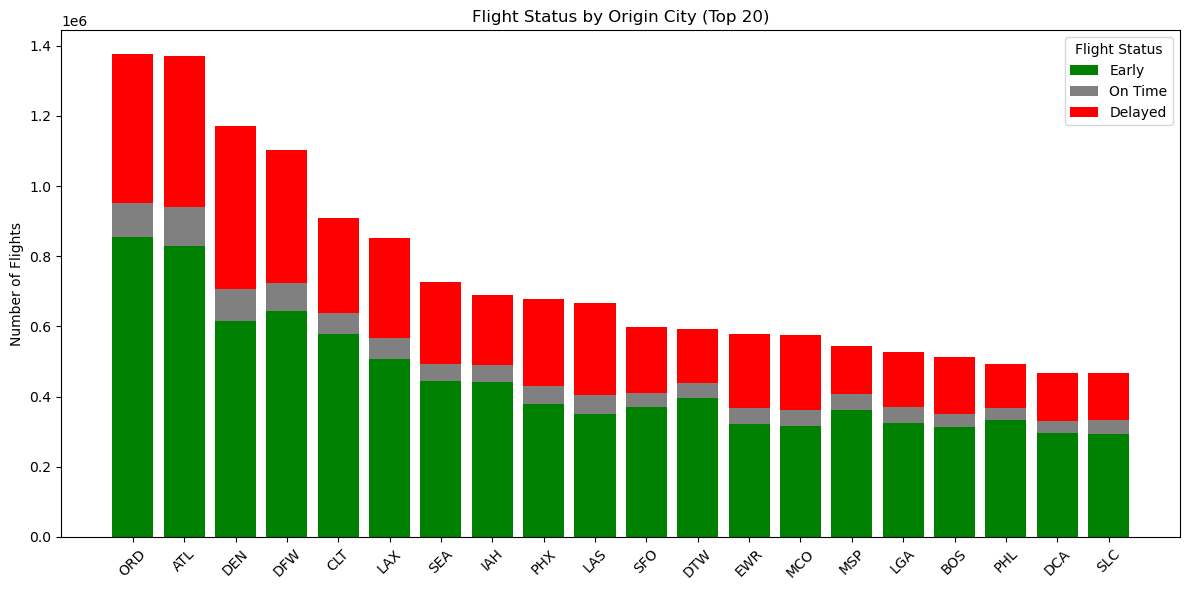

In [25]:
# Bar positions
cities = top_20["Origin"]
x = np.arange(len(cities))

# Heights
early = top_20["EarlyCount"]
on_time = top_20["OnTimeCount"]
delayed = top_20["DelayCount"]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(x, early, label="Early", color="green")
plt.bar(x, on_time, bottom=early, label="On Time", color="gray")
plt.bar(x, delayed, bottom=early + on_time, label="Delayed", color="red")

# Labels and formatting
plt.xticks(x, cities, rotation=45)
plt.ylabel("Number of Flights")
plt.title("Flight Status by Origin City (Top 20)")
plt.legend(title="Flight Status")
plt.tight_layout()
plt.show()

## Number of flights per year

In [26]:
year_delay = my_df.select(["Year", "DepDelay"]).groupBy("Year")\
        .agg(count(F.when(col("DepDelay") > 0, 1)).alias("DelayCount"), 
             count(F.when(col("DepDelay") < 0, 1)).alias("EarlyCount"),
            count("*").alias("TotalCount")).orderBy(col("Year"))
pandas_year_delay = year_delay.toPandas()

In [27]:
pydf = pandas_year_delay.copy()
pydf["OnTimeCount"] = pydf["TotalCount"] - pydf["DelayCount"] - pydf["EarlyCount"]
year_counts = pydf

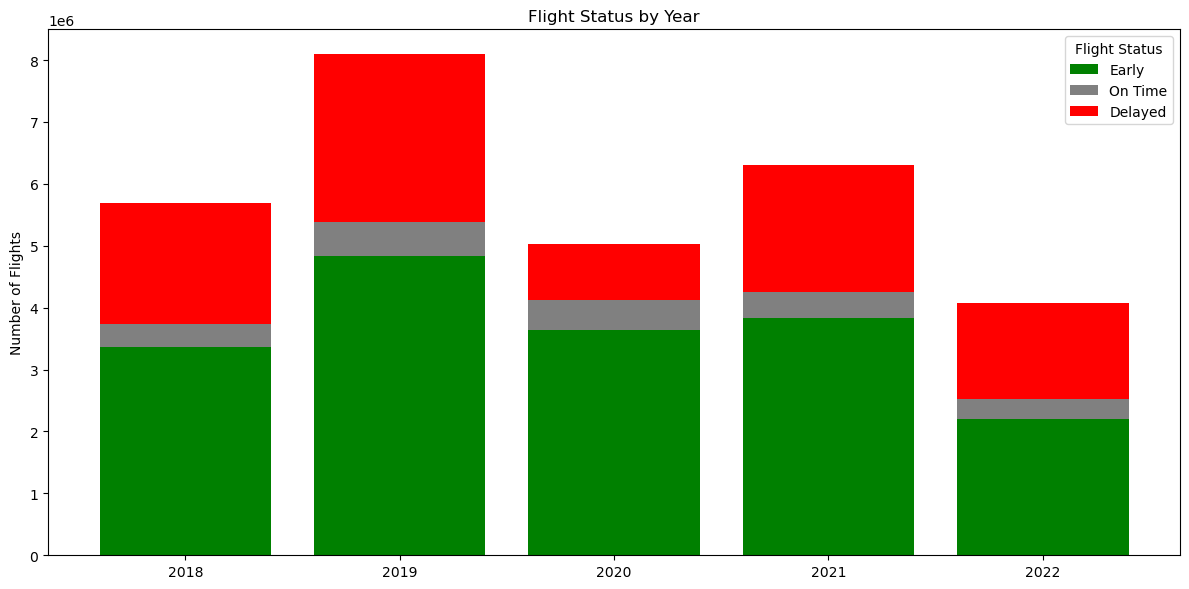

In [28]:
# Bar positions
years = year_counts["Year"]
x = np.arange(len(years))

# Heights
early = year_counts["EarlyCount"]
on_time = year_counts["OnTimeCount"]
delayed = year_counts["DelayCount"]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(x, early, label="Early", color="green")
plt.bar(x, on_time, bottom=early, label="On Time", color="gray")
plt.bar(x, delayed, bottom=early + on_time, label="Delayed", color="red")

# Labels and formatting
plt.xticks(x, years)
plt.ylabel("Number of Flights")
plt.title("Flight Status by Year")
plt.legend(title="Flight Status")
plt.tight_layout()
plt.show()

## Same thing with months

In [29]:
month_delay = my_df.select(["Month", "DepDelay"]).groupBy("Month")\
        .agg(count(F.when(col("DepDelay") > 0, 1)).alias("DelayCount"), 
             count(F.when(col("DepDelay") < 0, 1)).alias("EarlyCount"),
            count("*").alias("TotalCount")).orderBy(col("Month"))
pandas_month_delay = month_delay.toPandas()

In [30]:
pmdf = pandas_month_delay.copy()
pmdf["OnTimeCount"] = pmdf["TotalCount"] - pmdf["DelayCount"] - pmdf["EarlyCount"]
month_counts = pmdf

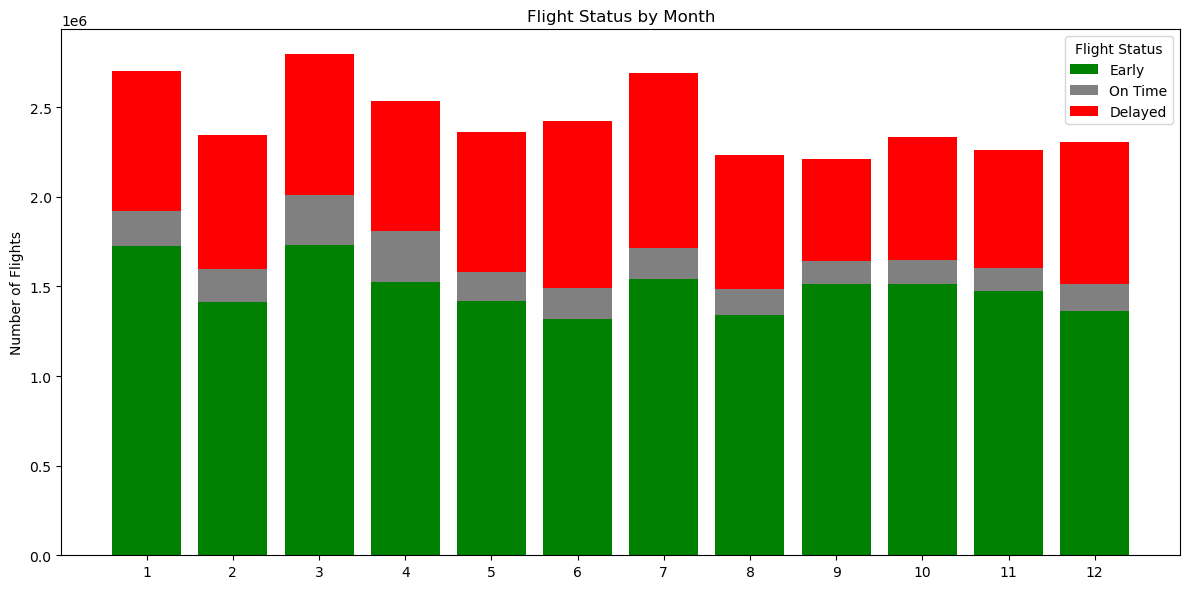

In [31]:
# Bar positions
months = month_counts["Month"]
x = np.arange(len(months))

# Heights
early = month_counts["EarlyCount"]
on_time = month_counts["OnTimeCount"]
delayed = month_counts["DelayCount"]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(x, early, label="Early", color="green")
plt.bar(x, on_time, bottom=early, label="On Time", color="gray")
plt.bar(x, delayed, bottom=early + on_time, label="Delayed", color="red")

# Labels and formatting
plt.xticks(x, months)
plt.ylabel("Number of Flights")
plt.title("Flight Status by Month")
plt.legend(title="Flight Status")
plt.tight_layout()
plt.show()